In [2]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt

In [46]:
df = pd.read_csv("soil_pollution_diseases.csv")
df.head()

Case_ID Date_Reported  Region   Country Pollutant_Type  \
0  CASE_100000    2024-09-12  Africa  Pakistan           Lead   
1  CASE_100001    2024-01-01  Africa   Germany           Lead   
2  CASE_100002    2025-02-24  Europe   Germany           Lead   
3  CASE_100003    2024-09-24    Asia       USA           Lead   
4  CASE_100004    2023-05-24  Africa     India       Chromium   

   Pollutant_Concentration_mg_kg  Soil_pH  Temperature_C  Humidity_%  \
0                          78.04     8.30           35.6        64.9   
1                          16.33     7.96           31.0        73.1   
2                         167.33     5.35           16.4        33.8   
3                          89.23     5.66           31.4        30.5   
4                          93.93     7.64           17.0        58.6   

   Rainfall_mm  ... Soil_Texture Soil_Organic_Matter_%  \
0         62.4  ...        Sandy                  1.98   
1          8.2  ...        Silty                  9.71   
2        121.7  ...         Clay                  5.49   
3        116.9  ...        Silty                  3.98   
4        237.0  ...        Loamy                  0.94   

               Disease_Type Disease_Severity       Health_Symptoms  \
0  Gastrointestinal Disease         Moderate  Breathing Difficulty   
1                    Cancer             Mild  Breathing Difficulty   
2  Gastrointestinal Disease           Severe                Nausea   
3     Neurological Disorder           Severe               Fatigue   
4              Skin Disease         Moderate  Breathing Difficulty   

   Age_Group_Affected Gender_Most_Affected     Mitigation_Measure  \
0              Adults                 Male  Government Regulation   
1             Elderly                 Both    Community Awareness   
2            Children                 Both       Soil Remediation   
3              Adults                 Male    Community Awareness   
4            Children               Female  Government Regulation   

  Case_Resolved Follow_Up_Required  
0            No                Yes  
1           Yes                 No  
2           Yes                 No  
3           Yes                 No  
4           Yes                Yes  

[5 rows x 24 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Case_ID                        3000 non-null   object 
 1   Date_Reported                  3000 non-null   object 
 2   Region                         3000 non-null   object 
 3   Country                        3000 non-null   object 
 4   Pollutant_Type                 3000 non-null   object 
 5   Pollutant_Concentration_mg_kg  3000 non-null   float64
 6   Soil_pH                        3000 non-null   float64
 7   Temperature_C                  3000 non-null   float64
 8   Humidity_%                     3000 non-null   float64
 9   Rainfall_mm                    3000 non-null   float64
 10  Crop_Type                      3000 non-null   object 
 11  Farming_Practice               3000 non-null   object 
 12  Nearby_Industry                2418 non-null   o

In [6]:
df["Nearby_Industry"].isnull().sum()

np.int64(582)

In [7]:
df["Disease_Severity"].value_counts()


Disease_Severity
Severe      1023
Moderate     998
Mild         979
Name: count, dtype: int64

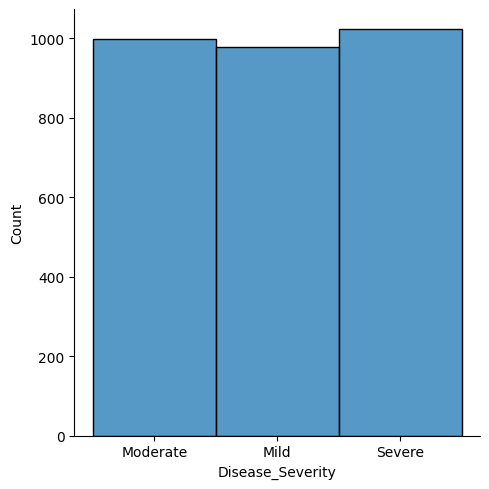

In [8]:
sns.displot(df["Disease_Severity"])

In [9]:
df["Health_Symptoms"].value_counts()

Health_Symptoms
Rash                    523
Breathing Difficulty    514
Fatigue                 502
Nausea                  500
Headache                488
Abdominal Pain          473
Name: count, dtype: int64

In [10]:
df["Mitigation_Measure"].value_counts()

Mitigation_Measure
Crop Rotation              626
Government Regulation      622
Soil Remediation           596
Community Awareness        592
Chemical Neutralization    564
Name: count, dtype: int64

In [11]:
df["Disease_Type"].value_counts()

Disease_Type
Cancer                      622
Skin Disease                622
Neurological Disorder       597
Respiratory Issues          581
Gastrointestinal Disease    578
Name: count, dtype: int64

In [12]:
df["Pollutant_Type"].value_counts()

Pollutant_Type
Lead          529
Cadmium       516
Chromium      509
Pesticides    499
Arsenic       489
Mercury       458
Name: count, dtype: int64

In [13]:
df["Crop_Type"].value_counts()

Crop_Type
Corn       526
Wheat      516
Soybean    497
Potato     493
Cotton     485
Rice       483
Name: count, dtype: int64

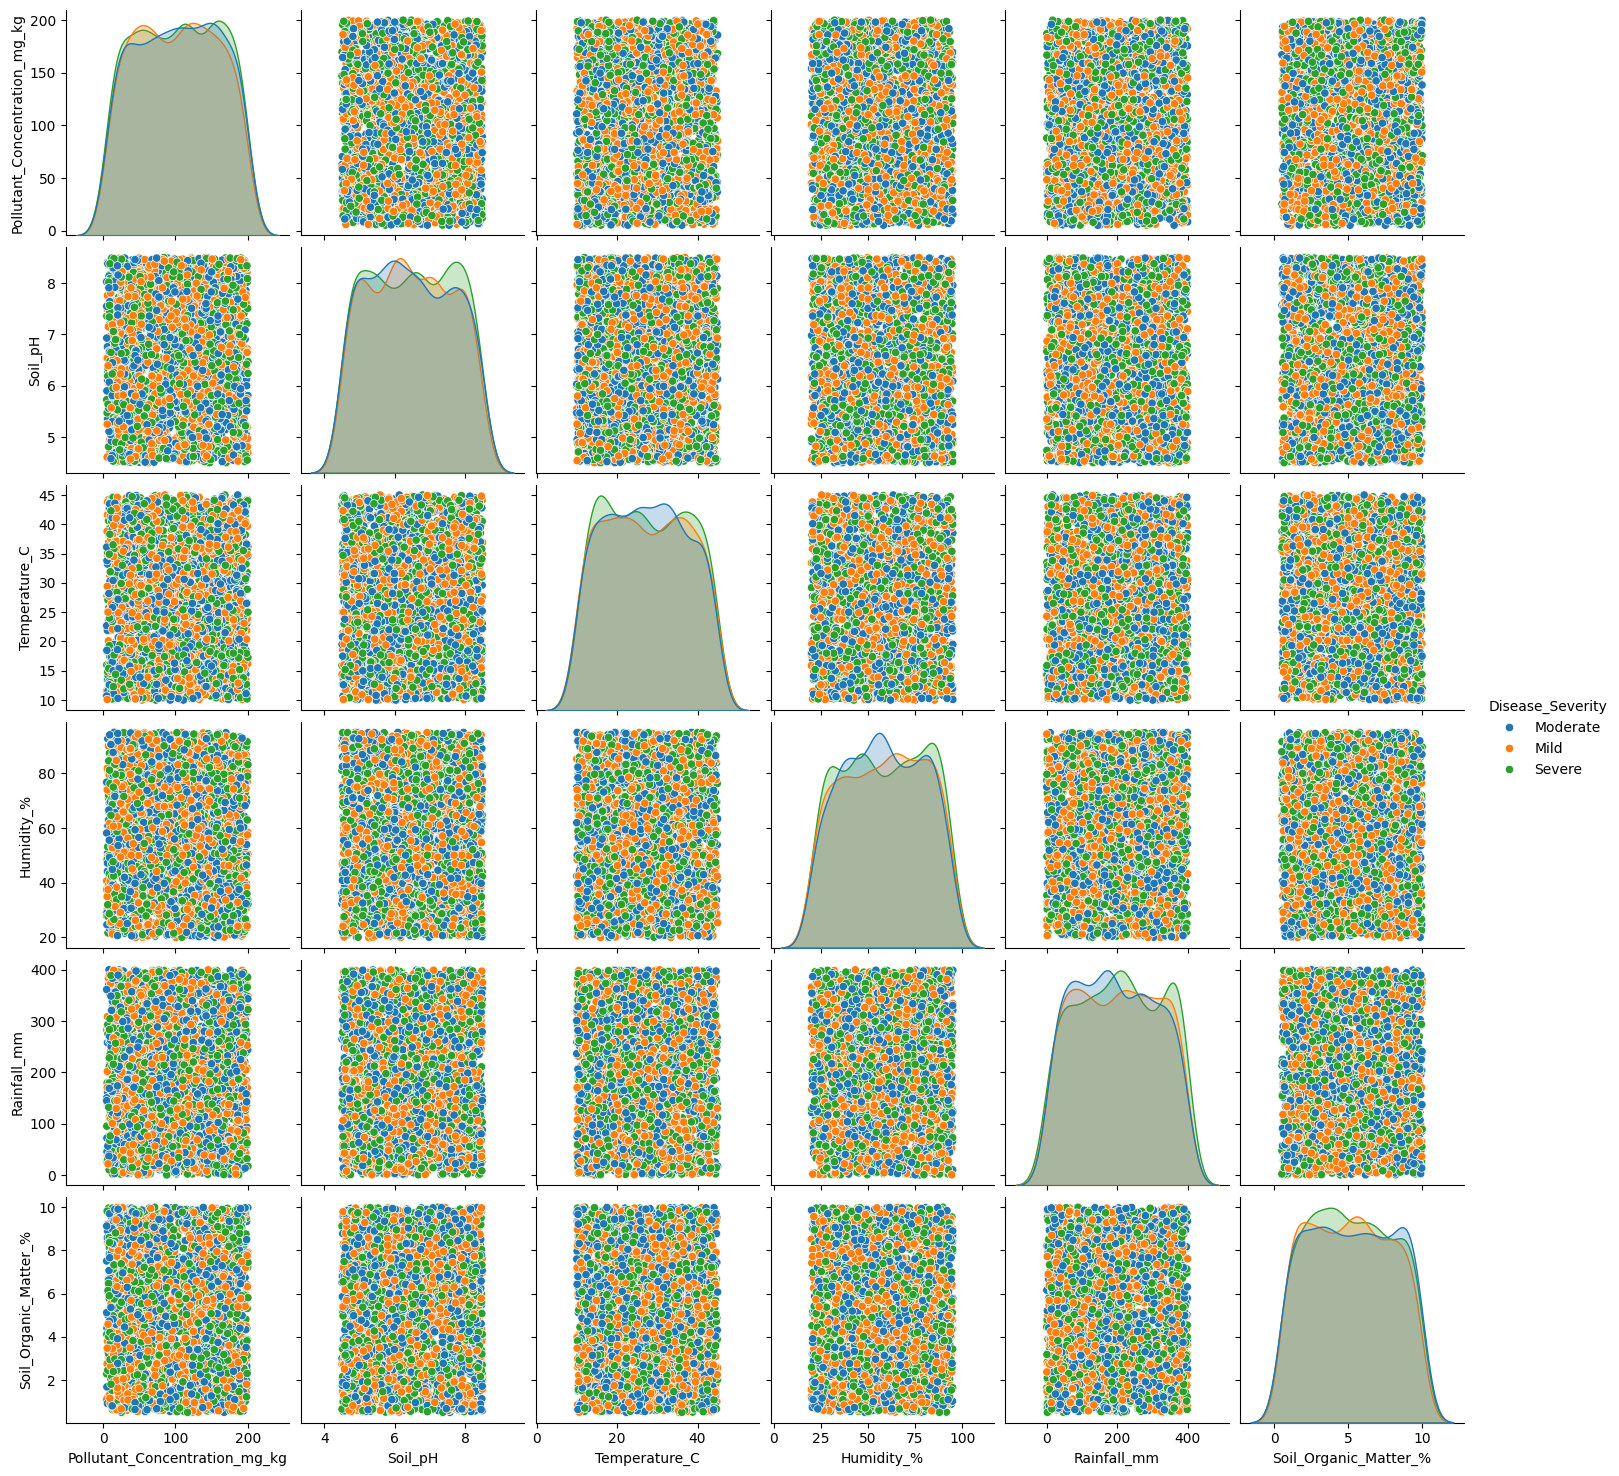

In [14]:
sns.pairplot(df, hue="Disease_Severity")

# Procesado de datos y feature engineering

In [47]:
df_proc = df.copy()
df_proc.head()

Case_ID Date_Reported  Region   Country Pollutant_Type  \
0  CASE_100000    2024-09-12  Africa  Pakistan           Lead   
1  CASE_100001    2024-01-01  Africa   Germany           Lead   
2  CASE_100002    2025-02-24  Europe   Germany           Lead   
3  CASE_100003    2024-09-24    Asia       USA           Lead   
4  CASE_100004    2023-05-24  Africa     India       Chromium   

   Pollutant_Concentration_mg_kg  Soil_pH  Temperature_C  Humidity_%  \
0                          78.04     8.30           35.6        64.9   
1                          16.33     7.96           31.0        73.1   
2                         167.33     5.35           16.4        33.8   
3                          89.23     5.66           31.4        30.5   
4                          93.93     7.64           17.0        58.6   

   Rainfall_mm  ... Soil_Texture Soil_Organic_Matter_%  \
0         62.4  ...        Sandy                  1.98   
1          8.2  ...        Silty                  9.71   
2        121.7  ...         Clay                  5.49   
3        116.9  ...        Silty                  3.98   
4        237.0  ...        Loamy                  0.94   

               Disease_Type Disease_Severity       Health_Symptoms  \
0  Gastrointestinal Disease         Moderate  Breathing Difficulty   
1                    Cancer             Mild  Breathing Difficulty   
2  Gastrointestinal Disease           Severe                Nausea   
3     Neurological Disorder           Severe               Fatigue   
4              Skin Disease         Moderate  Breathing Difficulty   

   Age_Group_Affected Gender_Most_Affected     Mitigation_Measure  \
0              Adults                 Male  Government Regulation   
1             Elderly                 Both    Community Awareness   
2            Children                 Both       Soil Remediation   
3              Adults                 Male    Community Awareness   
4            Children               Female  Government Regulation   

  Case_Resolved Follow_Up_Required  
0            No                Yes  
1           Yes                 No  
2           Yes                 No  
3           Yes                 No  
4           Yes                Yes  

[5 rows x 24 columns]

## Codificación Ordinal Personalizada de Disease_Severity

In [49]:
orden = [["Mild", "Moderate", "Severe"]]

encoder = OrdinalEncoder(categories=orden)

df_proc["Disease_Severity_enc"] = encoder.fit_transform(df_proc[["Disease_Severity"]]) 

df_proc.head()

Case_ID Date_Reported  Region   Country Pollutant_Type  \
0  CASE_100000    2024-09-12  Africa  Pakistan           Lead   
1  CASE_100001    2024-01-01  Africa   Germany           Lead   
2  CASE_100002    2025-02-24  Europe   Germany           Lead   
3  CASE_100003    2024-09-24    Asia       USA           Lead   
4  CASE_100004    2023-05-24  Africa     India       Chromium   

   Pollutant_Concentration_mg_kg  Soil_pH  Temperature_C  Humidity_%  \
0                          78.04     8.30           35.6        64.9   
1                          16.33     7.96           31.0        73.1   
2                         167.33     5.35           16.4        33.8   
3                          89.23     5.66           31.4        30.5   
4                          93.93     7.64           17.0        58.6   

   Rainfall_mm  ... Soil_Organic_Matter_%              Disease_Type  \
0         62.4  ...                  1.98  Gastrointestinal Disease   
1          8.2  ...                  9.71                    Cancer   
2        121.7  ...                  5.49  Gastrointestinal Disease   
3        116.9  ...                  3.98     Neurological Disorder   
4        237.0  ...                  0.94              Skin Disease   

  Disease_Severity       Health_Symptoms Age_Group_Affected  \
0         Moderate  Breathing Difficulty             Adults   
1             Mild  Breathing Difficulty            Elderly   
2           Severe                Nausea           Children   
3           Severe               Fatigue             Adults   
4         Moderate  Breathing Difficulty           Children   

   Gender_Most_Affected     Mitigation_Measure Case_Resolved  \
0                  Male  Government Regulation            No   
1                  Both    Community Awareness           Yes   
2                  Both       Soil Remediation           Yes   
3                  Male    Community Awareness           Yes   
4                Female  Government Regulation           Yes   

  Follow_Up_Required Disease_Severity_enc  
0                Yes                  1.0  
1                 No                  0.0  
2                 No                  2.0  
3                 No                  2.0  
4                Yes                  1.0  

[5 rows x 25 columns]

In [41]:
df_proc.corr(method='spearman', numeric_only=True)["Disease_Severity_enc"]

Pollutant_Concentration_mg_kg    0.011126
Soil_pH                          0.013148
Temperature_C                    0.004351
Humidity_%                       0.003582
Rainfall_mm                      0.020239
Soil_Organic_Matter_%            0.009100
Disease_Severity_enc             1.000000
Name: Disease_Severity_enc, dtype: float64

In [42]:
df.corr(numeric_only=True)

Pollutant_Concentration_mg_kg   Soil_pH  \
Pollutant_Concentration_mg_kg                       1.000000  0.007033   
Soil_pH                                             0.007033  1.000000   
Temperature_C                                       0.009678 -0.014724   
Humidity_%                                         -0.040899 -0.020102   
Rainfall_mm                                         0.020506 -0.005299   
Soil_Organic_Matter_%                               0.027290  0.000226   

                               Temperature_C  Humidity_%  Rainfall_mm  \
Pollutant_Concentration_mg_kg       0.009678   -0.040899     0.020506   
Soil_pH                            -0.014724   -0.020102    -0.005299   
Temperature_C                       1.000000   -0.026802     0.032773   
Humidity_%                         -0.026802    1.000000    -0.002770   
Rainfall_mm                         0.032773   -0.002770     1.000000   
Soil_Organic_Matter_%              -0.037816    0.022800    -0.012259   

                               Soil_Organic_Matter_%  
Pollutant_Concentration_mg_kg               0.027290  
Soil_pH                                     0.000226  
Temperature_C                              -0.037816  
Humidity_%                                  0.022800  
Rainfall_mm                                -0.012259  
Soil_Organic_Matter_%                       1.000000

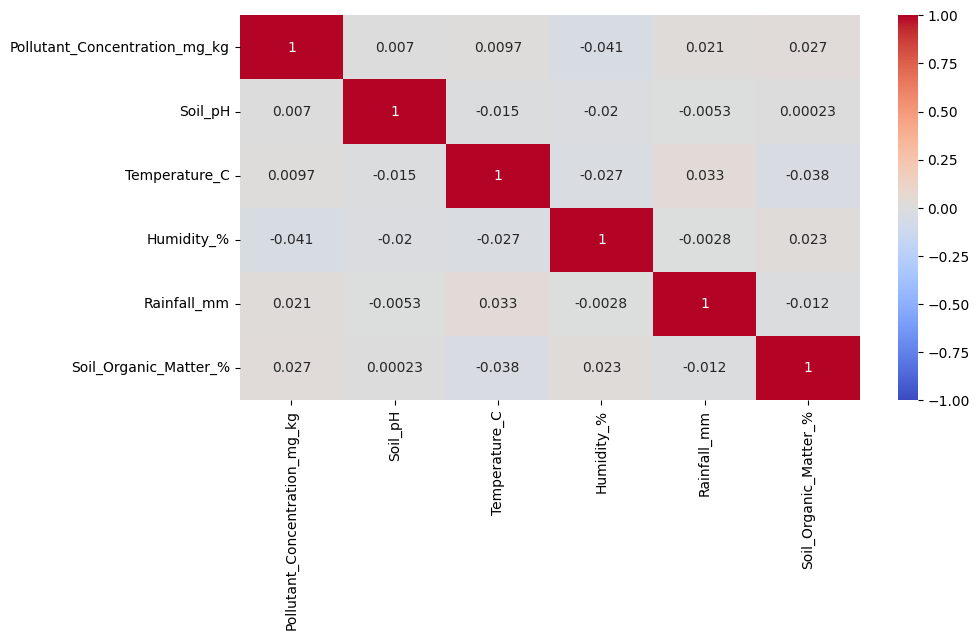

In [19]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, cmap="coolwarm")
plt.show()

In [50]:
df_proc= df_proc.drop(columns=["Case_ID", "Disease_Severity"], axis=1)
df_proc.head()

Date_Reported  Region   Country Pollutant_Type  \
0    2024-09-12  Africa  Pakistan           Lead   
1    2024-01-01  Africa   Germany           Lead   
2    2025-02-24  Europe   Germany           Lead   
3    2024-09-24    Asia       USA           Lead   
4    2023-05-24  Africa     India       Chromium   

   Pollutant_Concentration_mg_kg  Soil_pH  Temperature_C  Humidity_%  \
0                          78.04     8.30           35.6        64.9   
1                          16.33     7.96           31.0        73.1   
2                         167.33     5.35           16.4        33.8   
3                          89.23     5.66           31.4        30.5   
4                          93.93     7.64           17.0        58.6   

   Rainfall_mm Crop_Type  ... Soil_Texture Soil_Organic_Matter_%  \
0         62.4     Wheat  ...        Sandy                  1.98   
1          8.2    Potato  ...        Silty                  9.71   
2        121.7   Soybean  ...         Clay                  5.49   
3        116.9     Wheat  ...        Silty                  3.98   
4        237.0    Cotton  ...        Loamy                  0.94   

               Disease_Type       Health_Symptoms  Age_Group_Affected  \
0  Gastrointestinal Disease  Breathing Difficulty              Adults   
1                    Cancer  Breathing Difficulty             Elderly   
2  Gastrointestinal Disease                Nausea            Children   
3     Neurological Disorder               Fatigue              Adults   
4              Skin Disease  Breathing Difficulty            Children   

  Gender_Most_Affected     Mitigation_Measure Case_Resolved  \
0                 Male  Government Regulation            No   
1                 Both    Community Awareness           Yes   
2                 Both       Soil Remediation           Yes   
3                 Male    Community Awareness           Yes   
4               Female  Government Regulation           Yes   

  Follow_Up_Required Disease_Severity_enc  
0                Yes                  1.0  
1                 No                  0.0  
2                 No                  2.0  
3                 No                  2.0  
4                Yes                  1.0  

[5 rows x 23 columns]

## Rellenamos los valores nulos de la columna "Nearby_Industry" con la categoría Unknown

In [52]:
df_proc["Nearby_Industry"] = df_proc["Nearby_Industry"].fillna("Unknown")
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date_Reported                  3000 non-null   object 
 1   Region                         3000 non-null   object 
 2   Country                        3000 non-null   object 
 3   Pollutant_Type                 3000 non-null   object 
 4   Pollutant_Concentration_mg_kg  3000 non-null   float64
 5   Soil_pH                        3000 non-null   float64
 6   Temperature_C                  3000 non-null   float64
 7   Humidity_%                     3000 non-null   float64
 8   Rainfall_mm                    3000 non-null   float64
 9   Crop_Type                      3000 non-null   object 
 10  Farming_Practice               3000 non-null   object 
 11  Nearby_Industry                3000 non-null   object 
 12  Water_Source_Type              3000 non-null   o

## Creación de índice de toxicidad en suelo

In [53]:
# Limites seguros según el estandar de FAO/OMS para los contaminantes de la columna "Pollutant_Type"

safe_limits = {
    "Lead": 50,
    "Cadmium": 3,
    "Chromium": 70,
    "Pesticides": 10,
    "Arsenic": 20,
    "Mercury": 2
}

In [54]:
df_proc["exceso_contaminante"] = df_proc.apply(lambda row: row["Pollutant_Concentration_mg_kg"] / safe_limits[row["Pollutant_Type"]], axis=1)
df_proc.describe()

Pollutant_Concentration_mg_kg      Soil_pH  Temperature_C   Humidity_%  \
count                    3000.000000  3000.000000    3000.000000  3000.000000   
mean                      102.745587     6.463747      27.225100    58.222867   
std                        55.907366     1.166305      10.084577    21.357711   
min                         5.030000     4.500000      10.000000    20.000000   
25%                        54.425000     5.457500      18.500000    39.900000   
50%                       104.085000     6.450000      27.000000    58.450000   
75%                       151.472500     7.490000      35.825000    76.800000   
max                       199.990000     8.500000      45.000000    95.000000   

       Rainfall_mm  Soil_Organic_Matter_%  Disease_Severity_enc  \
count   3000.00000            3000.000000           3000.000000   
mean     200.31660               5.175093              1.014667   
std      115.27187               2.761633              0.816909   
min        0.00000               0.500000              0.000000   
25%      100.60000               2.760000              0.000000   
50%      199.00000               5.130000              1.000000   
75%      299.75000               7.550000              2.000000   
max      399.70000              10.000000              2.000000   

       exceso_contaminante  
count          3000.000000  
mean             16.769478  
std              22.746840  
min               0.073000  
25%               2.041071  
50%               5.794000  
75%              19.978000  
max              99.760000

## Clasificación de lo anterior en categorias de riesgo

In [57]:
# Diccionario de categorías de riesgo basado en exceso de contaminante
categorias_riesgo = {
    "Seguro": (0, 1),            # Hasta el límite seguro
    "Moderado": (1, 2),        # 1–2 veces el límite seguro
    "Alto": (2, 3),            # 2–3 veces el límite seguro
    "Extremo": (3, float("inf")) # Más de 3 veces el límite seguro
}

def clasificar_riesgo(valor):
    for categoria, (min_val, max_val) in categorias_riesgo.items():
        if min_val <= valor < max_val:
            return categoria
        
df_proc["riesgo_contaminante"] = df_proc["exceso_contaminante"].apply(clasificar_riesgo)

df_proc.head()

Date_Reported  Region   Country Pollutant_Type  \
0    2024-09-12  Africa  Pakistan           Lead   
1    2024-01-01  Africa   Germany           Lead   
2    2025-02-24  Europe   Germany           Lead   
3    2024-09-24    Asia       USA           Lead   
4    2023-05-24  Africa     India       Chromium   

   Pollutant_Concentration_mg_kg  Soil_pH  Temperature_C  Humidity_%  \
0                          78.04     8.30           35.6        64.9   
1                          16.33     7.96           31.0        73.1   
2                         167.33     5.35           16.4        33.8   
3                          89.23     5.66           31.4        30.5   
4                          93.93     7.64           17.0        58.6   

   Rainfall_mm Crop_Type  ... Gender_Most_Affected     Mitigation_Measure  \
0         62.4     Wheat  ...                 Male  Government Regulation   
1          8.2    Potato  ...                 Both    Community Awareness   
2        121.7   Soybean  ...                 Both       Soil Remediation   
3        116.9     Wheat  ...                 Male    Community Awareness   
4        237.0    Cotton  ...               Female  Government Regulation   

  Case_Resolved Follow_Up_Required  Disease_Severity_enc exceso_contaminante  \
0            No                Yes                   1.0            1.560800   
1           Yes                 No                   0.0            0.326600   
2           Yes                 No                   2.0            3.346600   
3           Yes                 No                   2.0            1.784600   
4           Yes                Yes                   1.0            1.341857   

  riesgo_contaminante contaminante_ajustado contaminante_lluvia  \
0            Moderado              0.031264            2.534739   
1              Seguro              0.004289            0.353381   
2             Extremo              0.163370            7.419412   
3            Moderado              0.078405            3.870797   
4            Moderado              0.014655            4.522059   

  riesgo_suelo_cultivo_contaminante  
0                            0.0000  
1                            0.0000  
2                            3.3466  
3                            0.0000  
4                            0.0000  

[5 rows x 28 columns]

## Indice de exposición ambiental relativa

Combina Pollutant_Concentration_mg_kg con Soil_Organic_Matter_%, Rainfall_mm o Humidity_% para crear un índice que refleje cómo el contaminante se dispersa o afecta al cultivo/personas.

In [58]:
df_proc["exposicion_relativa"] = df_proc["Pollutant_Concentration_mg_kg"] * (1 + df_proc["Humidity_%"]/100)

## Alta concentración × pH fuera del rango óptimo

In [59]:
pH_fuera_optimo = ((df_proc["Soil_pH"] < 6.5) | (df_proc["Soil_pH"] > 7.5)).astype(int)
df_proc["contaminante_pH_fuera"] = df_proc["exceso_contaminante"] * pH_fuera_optimo

## Alta concentración de contaminante + baja humedad

Este índice pretende capturar la interacción entre la concentración del contaminante y la humedad del ambiente.

Idea: alta concentración de contaminante + baja humedad → mayor riesgo o severidad.

In [60]:
df_proc["contaminante_humedad"] = df_proc["exceso_contaminante"] * (1 / (df_proc["Humidity_%"] + 1e-6))

## Suelo ácido + cierto tipo de cultivo

Idea: Algunos cultivos son más sensibles a suelos ácidos, lo que puede aumentar la gravedad de la enfermedad.

| Cultivo  | pH óptimo aproximado | Sensible a suelo ácido (<6.5)?           |
|----------|-------------------|----------------------------------------|
| Corn     | 5.5 – 7.0         | Sí (riesgo si pH < 5.5)                |
| Wheat    | 6.0 – 7.5         | No                                     |
| Soybean  | 6.0 – 7.0         | Sí (riesgo si pH < 6.0)                |
| Potato   | 5.0 – 6.0         | Sí (riesgo si pH < 5.5)                |
| Cotton   | 5.5 – 7.5         | No                                     |
| Rice     | 5.0 – 6.5         | Parcial (riesgo si pH < 5.5)           |


In [61]:
# Marcar cultivos sensibles
cultivo_sensible = df_proc["Crop_Type"].isin(["Corn", "Soybean", "Potato", "Rice"])

# Suelo ácido (usar un umbral 6.5)
suelos_acidos = df_proc["Soil_pH"] < 6.5

# Índice interacción suelo ácido + cultivo sensible
df_proc["suelo_acido_cultivo_riesgo"] = suelos_acidos.astype(int) * cultivo_sensible.astype(int)


## Fertilidad relativa del suelo

In [62]:
df_proc["fertilidad_suelo"] = df_proc["Soil_Organic_Matter_%"] * (7 - abs(df_proc["Soil_pH"]-7))

## Clima extremo
combinación de temperatura, humedad y lluvia

In [63]:
df_proc["clima_extremo"] = df_proc["Temperature_C"]/30 + df_proc["Humidity_%"]/50 + df_proc["Rainfall_mm"]/100

## Exposición relativa

Ajusta la concentración de contaminante según factores ambientales que facilitan su impacto:

In [64]:
df_proc["exposicion_relativa"] = df_proc["exceso_contaminante"] * (1 + df_proc["Humidity_%"]/100)

## Número de síntomas

In [65]:
df_proc["num_sintomas"] = df_proc["Health_Symptoms"].apply(lambda x: len(x.split(",")))


## Borramos columnas originales con baja correlación

In [33]:
df_proc = df_proc.drop(columns=[
    "Pollutant_Concentration_mg_kg",
    "Soil_pH",
    "Temperature_C",
    "Humidity_%",
    "Rainfall_mm",
    "Soil_Organic_Matter_%"
])

In [34]:
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date_Reported               3000 non-null   object 
 1   Region                      3000 non-null   object 
 2   Country                     3000 non-null   object 
 3   Pollutant_Type              3000 non-null   object 
 4   Crop_Type                   3000 non-null   object 
 5   Farming_Practice            3000 non-null   object 
 6   Nearby_Industry             3000 non-null   object 
 7   Water_Source_Type           3000 non-null   object 
 8   Soil_Texture                3000 non-null   object 
 9   Disease_Type                3000 non-null   object 
 10  Health_Symptoms             3000 non-null   object 
 11  Age_Group_Affected          3000 non-null   object 
 12  Gender_Most_Affected        3000 non-null   object 
 13  Mitigation_Measure          3000 

In [66]:
df_proc["contaminante_ajustado"] = df_proc["exceso_contaminante"] * (1 / (df_proc["Humidity_%"] + 1e-6)) * abs(df_proc["Soil_pH"] - 7)
df_proc["contaminante_lluvia"] = df_proc["exceso_contaminante"] * (1 + df_proc["Rainfall_mm"]/100)
df_proc["riesgo_suelo_cultivo_contaminante"] = (
    suelos_acidos.astype(int) *
    cultivo_sensible.astype(int) *
    df_proc["exceso_contaminante"]
)
df_proc["fertilidad_cultivo_sensible"] = df_proc["fertilidad_suelo"] * cultivo_sensible.astype(int)
df_proc["exceso_contaminante_pct"] = df_proc["exceso_contaminante"].rank(pct=True)
df_proc["contaminante_humedad_pct"] = df_proc["contaminante_humedad"].rank(pct=True)


In [67]:
df_proc.corr(numeric_only=True)

Pollutant_Concentration_mg_kg   Soil_pH  \
Pollutant_Concentration_mg_kg                           1.000000  0.007033   
Soil_pH                                                 0.007033  1.000000   
Temperature_C                                           0.009678 -0.014724   
Humidity_%                                             -0.040899 -0.020102   
Rainfall_mm                                             0.020506 -0.005299   
Soil_Organic_Matter_%                                   0.027290  0.000226   
Disease_Severity_enc                                    0.011126  0.013532   
exceso_contaminante                                     0.394352 -0.033493   
contaminante_ajustado                                   0.279430 -0.222004   
contaminante_lluvia                                     0.353944 -0.030087   
riesgo_suelo_cultivo_contaminante                       0.217120 -0.313166   
exposicion_relativa                                     0.385560 -0.035861   
contaminante_pH_fuera                                   0.328823 -0.111057   
contaminante_humedad                                    0.351973 -0.020637   
suelo_acido_cultivo_riesgo                              0.015404 -0.590023   
fertilidad_suelo                                        0.031064  0.133541   
clima_extremo                                           0.007358 -0.015343   
num_sintomas                                                 NaN       NaN   
fertilidad_cultivo_sensible                             0.065770  0.095284   
exceso_contaminante_pct                                 0.458012 -0.019156   
contaminante_humedad_pct                                0.441294 -0.012736   

                                   Temperature_C  Humidity_%  Rainfall_mm  \
Pollutant_Concentration_mg_kg           0.009678   -0.040899     0.020506   
Soil_pH                                -0.014724   -0.020102    -0.005299   
Temperature_C                           1.000000   -0.026802     0.032773   
Humidity_%                             -0.026802    1.000000    -0.002770   
Rainfall_mm                             0.032773   -0.002770     1.000000   
Soil_Organic_Matter_%                  -0.037816    0.022800    -0.012259   
Disease_Severity_enc                    0.004225    0.003310     0.019984   
exceso_contaminante                     0.007031   -0.019932     0.025216   
contaminante_ajustado                   0.038851   -0.233845     0.023873   
contaminante_lluvia                     0.018228   -0.020378     0.271096   
riesgo_suelo_cultivo_contaminante       0.011003    0.012556     0.015853   
exposicion_relativa                    -0.002083    0.077021     0.023981   
contaminante_pH_fuera                   0.015467   -0.024521     0.017143   
contaminante_humedad                    0.026427   -0.285520     0.021620   
suelo_acido_cultivo_riesgo             -0.004752    0.033819     0.007221   
fertilidad_suelo                       -0.037500    0.025377    -0.011118   
clima_extremo                           0.283121    0.324103     0.908024   
num_sintomas                                 NaN         NaN          NaN   
fertilidad_cultivo_sensible            -0.005437    0.024179    -0.009302   
exceso_contaminante_pct                 0.020624   -0.006233     0.024364   
contaminante_humedad_pct                0.024824   -0.254099     0.023244   

                                   Soil_Organic_Matter_%  \
Pollutant_Concentration_mg_kg                   0.027290   
Soil_pH                                         0.000226   
Temperature_C                                  -0.037816   
Humidity_%                                      0.022800   
Rainfall_mm                                    -0.012259   
Soil_Organic_Matter_%                           1.000000   
Disease_Severity_enc                            0.009417   
exceso_contaminante                             0.013916   
contaminante_ajustado                           0.020173   
contaminante_lluvia    

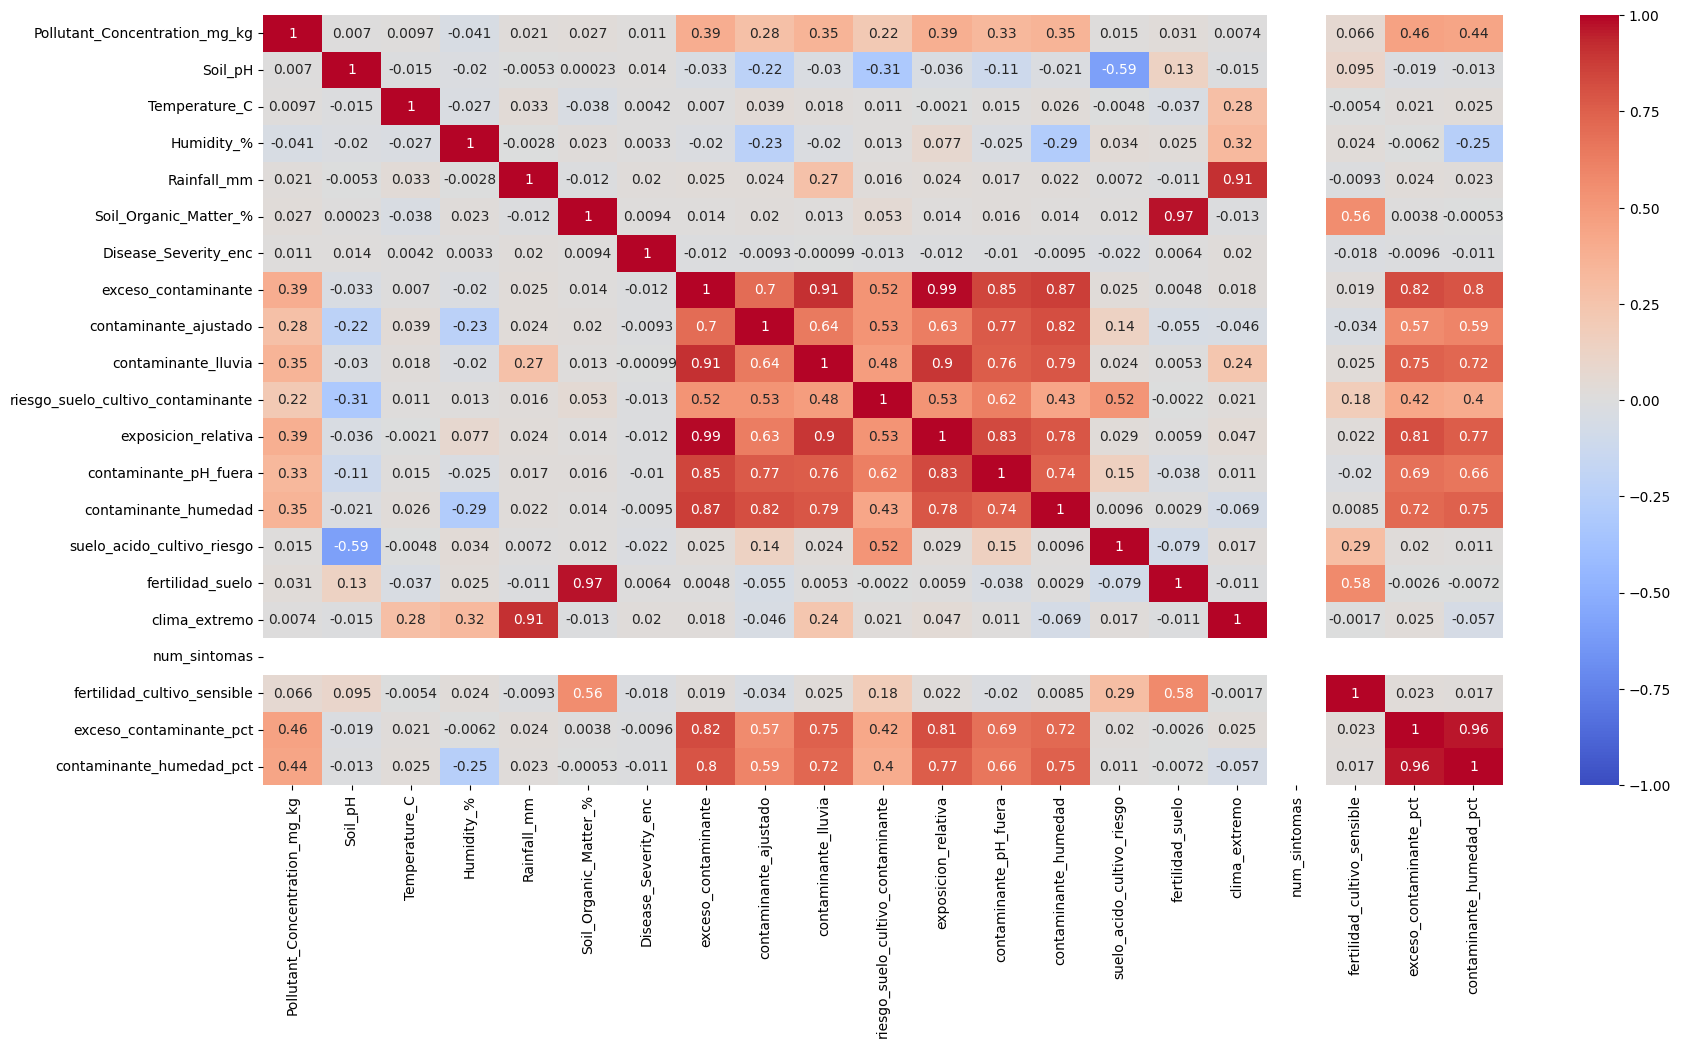

In [68]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_proc.corr(numeric_only=True), annot=True, vmin=-1, cmap="coolwarm")
plt.show()

In [ ]:
import numpy as np

# 1️⃣ Contaminante ajustado por fertilidad y humedad (riesgo real de planta)
df_proc["contaminante_fertilidad_humedad"] = df_proc["exceso_contaminante"] * df_proc["fertilidad_suelo"] / (df_proc["Humidity_%"] + 1e-6)

# 2️⃣ Contaminante × clima extremo
df_proc["contaminante_clima_extremo"] = df_proc["exceso_contaminante"] * df_proc["clima_extremo"]

# 3️⃣ Combinación de contaminante y suelo ácido para cultivos sensibles
df_proc["riesgo_contaminante_suelo_cultivo"] = df_proc["exceso_contaminante"] * df_proc["suelo_acido_cultivo_riesgo"]

# 4️⃣ Exceso de contaminante log-transformado
df_proc["log_exceso_contaminante"] = np.log1p(df_proc["exceso_contaminante"])

# 5️⃣ Índice compuesto de riesgo total: contaminante + suelo ácido + fertilidad + clima
df_proc["riesgo_total"] = (
    df_proc["exceso_contaminante"] + 
    df_proc["suelo_acido_cultivo_riesgo"] + 
    df_proc["fertilidad_suelo"] + 
    df_proc["clima_extremo"]
)

# 6️⃣ Contaminante ajustado por lluvia
df_proc["contaminante_lluvia_ajustado"] = df_proc["exceso_contaminante"] / (df_proc["Rainfall_mm"] + 1e-6)


In [ ]:
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date_Reported                      3000 non-null   object 
 1   Region                             3000 non-null   object 
 2   Country                            3000 non-null   object 
 3   Pollutant_Type                     3000 non-null   object 
 4   Crop_Type                          3000 non-null   object 
 5   Farming_Practice                   3000 non-null   object 
 6   Nearby_Industry                    3000 non-null   object 
 7   Water_Source_Type                  3000 non-null   object 
 8   Soil_Texture                       3000 non-null   object 
 9   Disease_Type                       3000 non-null   object 
 10  Health_Symptoms                    3000 non-null   object 
 11  Age_Group_Affected                 3000 non-null   objec

In [ ]:
# Seleccionar solo columnas numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Crear el escalador
scaler = StandardScaler()

# Aplicar la normalización
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Comprobar
print(df[numerical_cols].head())

   Pollutant_Concentration_mg_kg   Soil_pH  Temperature_C  Humidity_%  \
0                      -0.441976  1.574682       0.830605    0.312685   
1                      -1.545950  1.283115       0.374386    0.696686   
2                       1.155397 -0.955095      -1.073610   -1.143706   
3                      -0.241790 -0.689254       0.414058   -1.298242   
4                      -0.157708  1.008698      -1.014104    0.017661   

   Rainfall_mm  Soil_Organic_Matter_%  
0    -1.196646              -1.157151  
1    -1.666917               1.642384  
2    -0.682124               0.114048  
3    -0.723772              -0.432821  
4     0.318287              -1.533803  


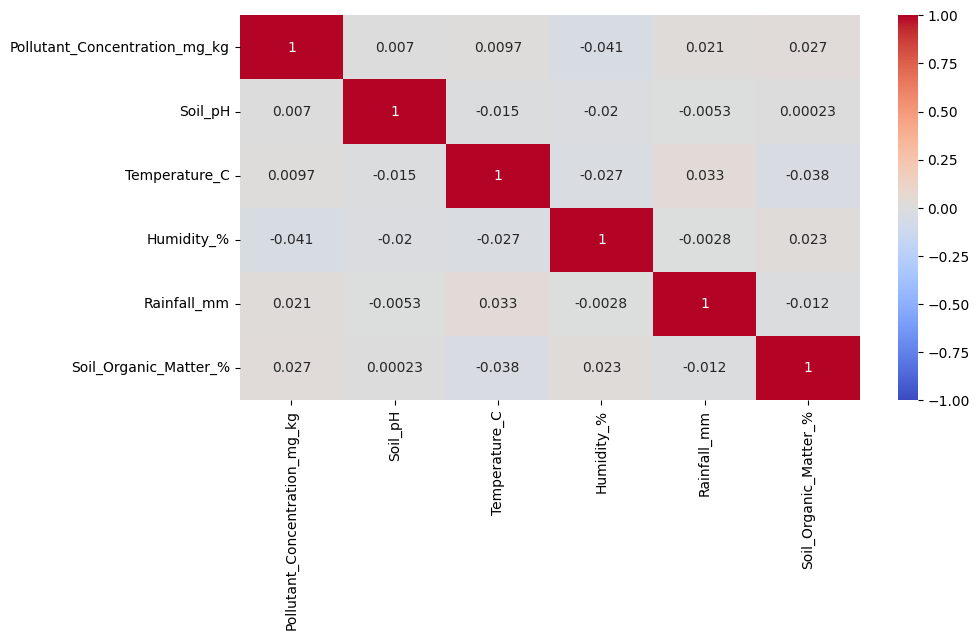

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, cmap="coolwarm")
plt.show()

In [ ]:
# Seleccionar solo columnas numéricas
numerical_cols = df_proc.select_dtypes(include=['float64', 'int64']).columns


# Crear el escalador
scaler = StandardScaler()

# Aplicar la normalización
df_proc[numerical_cols] = scaler.fit_transform(df_proc[numerical_cols])

# Comprobar
print(df_proc[numerical_cols].head())

   Disease_Severity_enc  exceso_contaminante  exposicion_relativa  \
0             -0.017957            -0.668718            -0.658218   
1             -1.242287            -0.722985            -0.713618   
2              1.206373            -0.590197            -0.605699   
3              1.206373            -0.658877            -0.664972   
4             -0.017957            -0.678344            -0.670509   

   contaminante_pH_fuera  contaminante_humedad  suelo_acido_cultivo_riesgo  \
0              -0.533381             -0.594666                   -0.710822   
1              -0.590700             -0.631010                   -0.710822   
2              -0.450444             -0.455531                    1.406821   
3              -0.522987             -0.530702                   -0.710822   
4              -0.543549             -0.596801                   -0.710822   

   fertilidad_suelo  clima_extremo  num_sintomas  contaminante_ajustado  ...  \
0         -1.146760      -0.754990  

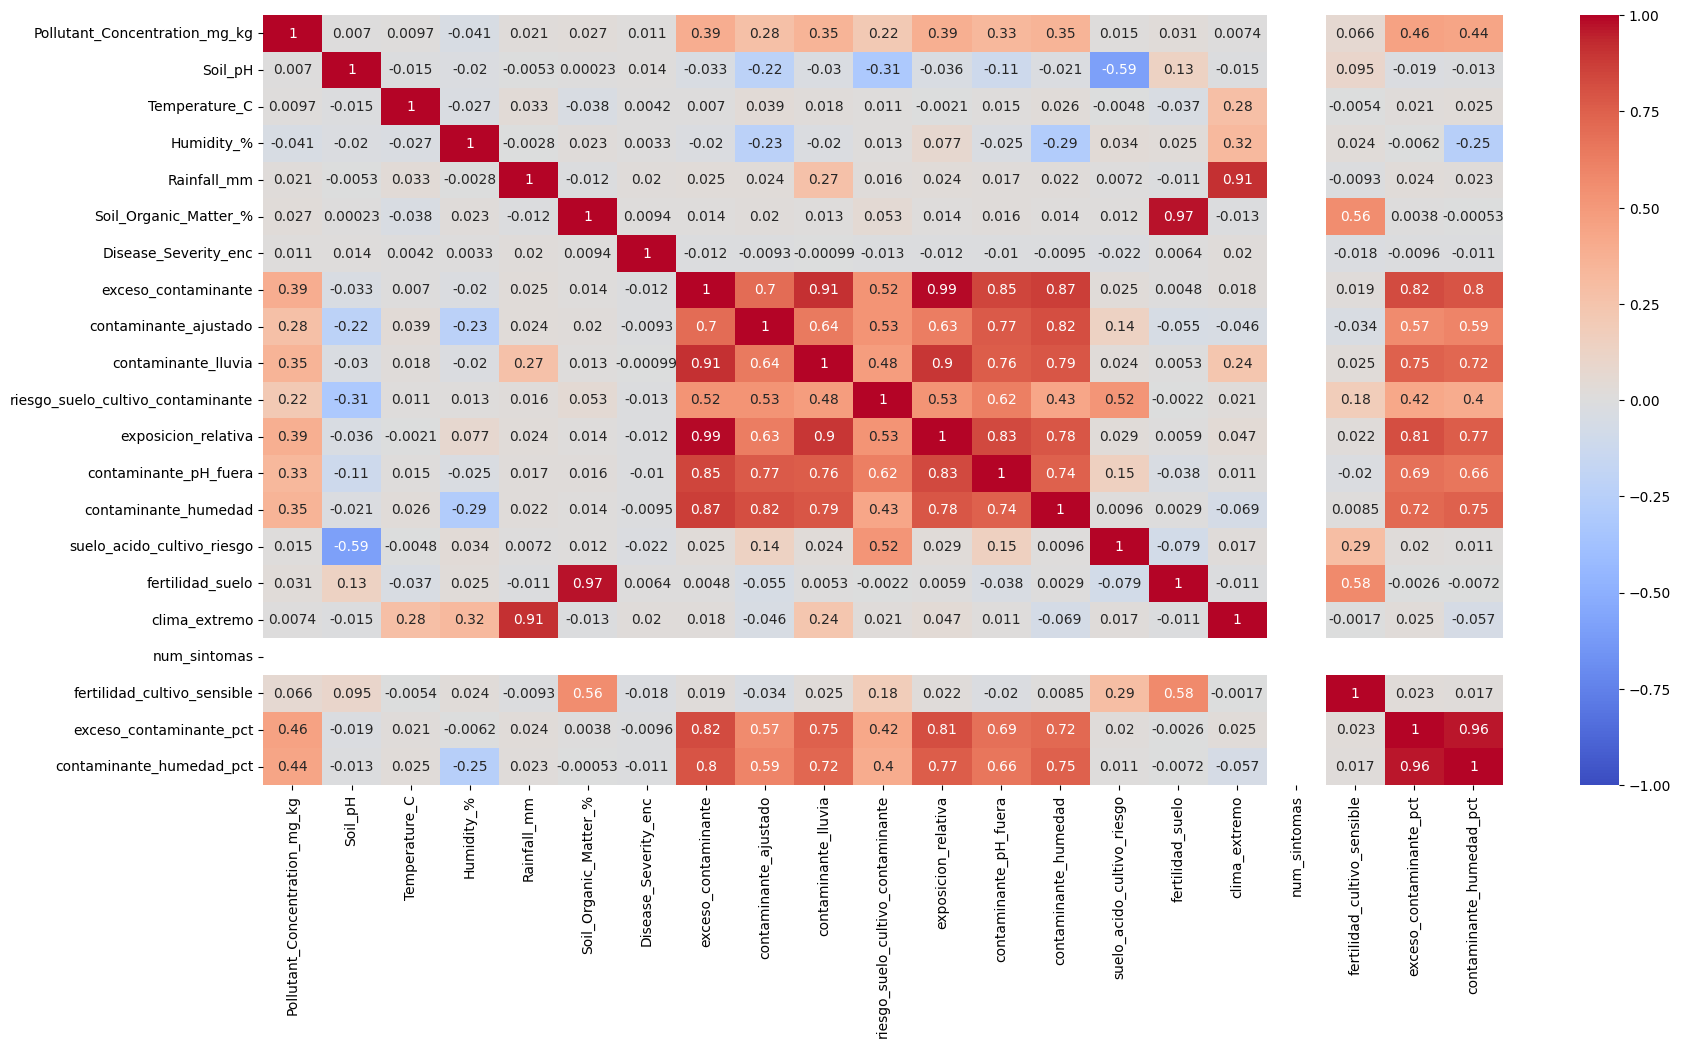

In [69]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_proc.corr(numeric_only=True), annot=True, vmin=-1, cmap="coolwarm")
plt.show()

In [70]:
df_proc.corr(numeric_only=True)

Pollutant_Concentration_mg_kg   Soil_pH  \
Pollutant_Concentration_mg_kg                           1.000000  0.007033   
Soil_pH                                                 0.007033  1.000000   
Temperature_C                                           0.009678 -0.014724   
Humidity_%                                             -0.040899 -0.020102   
Rainfall_mm                                             0.020506 -0.005299   
Soil_Organic_Matter_%                                   0.027290  0.000226   
Disease_Severity_enc                                    0.011126  0.013532   
exceso_contaminante                                     0.394352 -0.033493   
contaminante_ajustado                                   0.279430 -0.222004   
contaminante_lluvia                                     0.353944 -0.030087   
riesgo_suelo_cultivo_contaminante                       0.217120 -0.313166   
exposicion_relativa                                     0.385560 -0.035861   
contaminante_pH_fuera                                   0.328823 -0.111057   
contaminante_humedad                                    0.351973 -0.020637   
suelo_acido_cultivo_riesgo                              0.015404 -0.590023   
fertilidad_suelo                                        0.031064  0.133541   
clima_extremo                                           0.007358 -0.015343   
num_sintomas                                                 NaN       NaN   
fertilidad_cultivo_sensible                             0.065770  0.095284   
exceso_contaminante_pct                                 0.458012 -0.019156   
contaminante_humedad_pct                                0.441294 -0.012736   

                                   Temperature_C  Humidity_%  Rainfall_mm  \
Pollutant_Concentration_mg_kg           0.009678   -0.040899     0.020506   
Soil_pH                                -0.014724   -0.020102    -0.005299   
Temperature_C                           1.000000   -0.026802     0.032773   
Humidity_%                             -0.026802    1.000000    -0.002770   
Rainfall_mm                             0.032773   -0.002770     1.000000   
Soil_Organic_Matter_%                  -0.037816    0.022800    -0.012259   
Disease_Severity_enc                    0.004225    0.003310     0.019984   
exceso_contaminante                     0.007031   -0.019932     0.025216   
contaminante_ajustado                   0.038851   -0.233845     0.023873   
contaminante_lluvia                     0.018228   -0.020378     0.271096   
riesgo_suelo_cultivo_contaminante       0.011003    0.012556     0.015853   
exposicion_relativa                    -0.002083    0.077021     0.023981   
contaminante_pH_fuera                   0.015467   -0.024521     0.017143   
contaminante_humedad                    0.026427   -0.285520     0.021620   
suelo_acido_cultivo_riesgo             -0.004752    0.033819     0.007221   
fertilidad_suelo                       -0.037500    0.025377    -0.011118   
clima_extremo                           0.283121    0.324103     0.908024   
num_sintomas                                 NaN         NaN          NaN   
fertilidad_cultivo_sensible            -0.005437    0.024179    -0.009302   
exceso_contaminante_pct                 0.020624   -0.006233     0.024364   
contaminante_humedad_pct                0.024824   -0.254099     0.023244   

                                   Soil_Organic_Matter_%  \
Pollutant_Concentration_mg_kg                   0.027290   
Soil_pH                                         0.000226   
Temperature_C                                  -0.037816   
Humidity_%                                      0.022800   
Rainfall_mm                                    -0.012259   
Soil_Organic_Matter_%                           1.000000   
Disease_Severity_enc                            0.009417   
exceso_contaminante                             0.013916   
contaminante_ajustado                           0.020173   
contaminante_lluvia    